In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
notebook_dir = os.getcwd()
src_dir = os.path.join(notebook_dir,'..','src')


In [91]:
raw_dataset = pd.read_csv(os.path.join(src_dir,'creditcard.csv'))
raw_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**About Dataset**

**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [50]:
cols = raw_dataset.columns.values.astype(str)
unique_values = {}
counter = []
for col in cols:
    counter.append(len(raw_dataset[col].unique())) 
    
#unique_values = pd.DataFrame(unique_values)
unique_values['cols']=cols
unique_values['unique_values']=counter

unique_values = pd.DataFrame(unique_values)

In [51]:
sns.set(style='darkgrid', color_codes=True)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

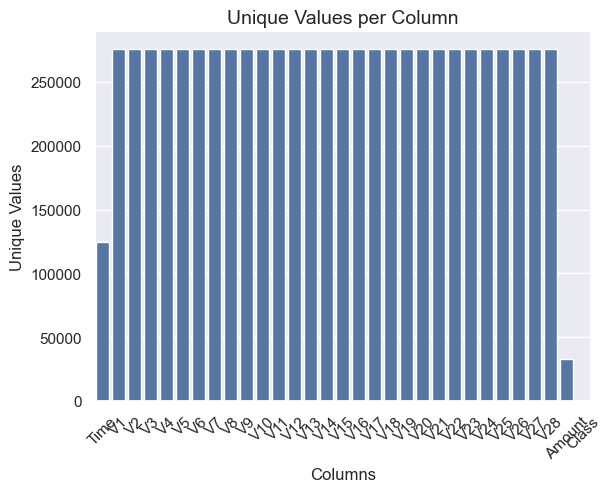

In [52]:
ax = sns.barplot(x='cols', y='unique_values', data=unique_values)  

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Unique Values', fontsize=12)
plt.title('Unique Values per Column', fontsize=14)
plt.xticks(rotation=45)  

plt.show()

Datos escalables

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(raw_dataset)

In [55]:
df_scaled = pd.DataFrame(df_scaled,columns=raw_dataset.columns)
df_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,-0.041599
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,-0.041599
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,-0.041599
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,-0.041599


In [56]:
correlation_matrix = df_scaled.corr()

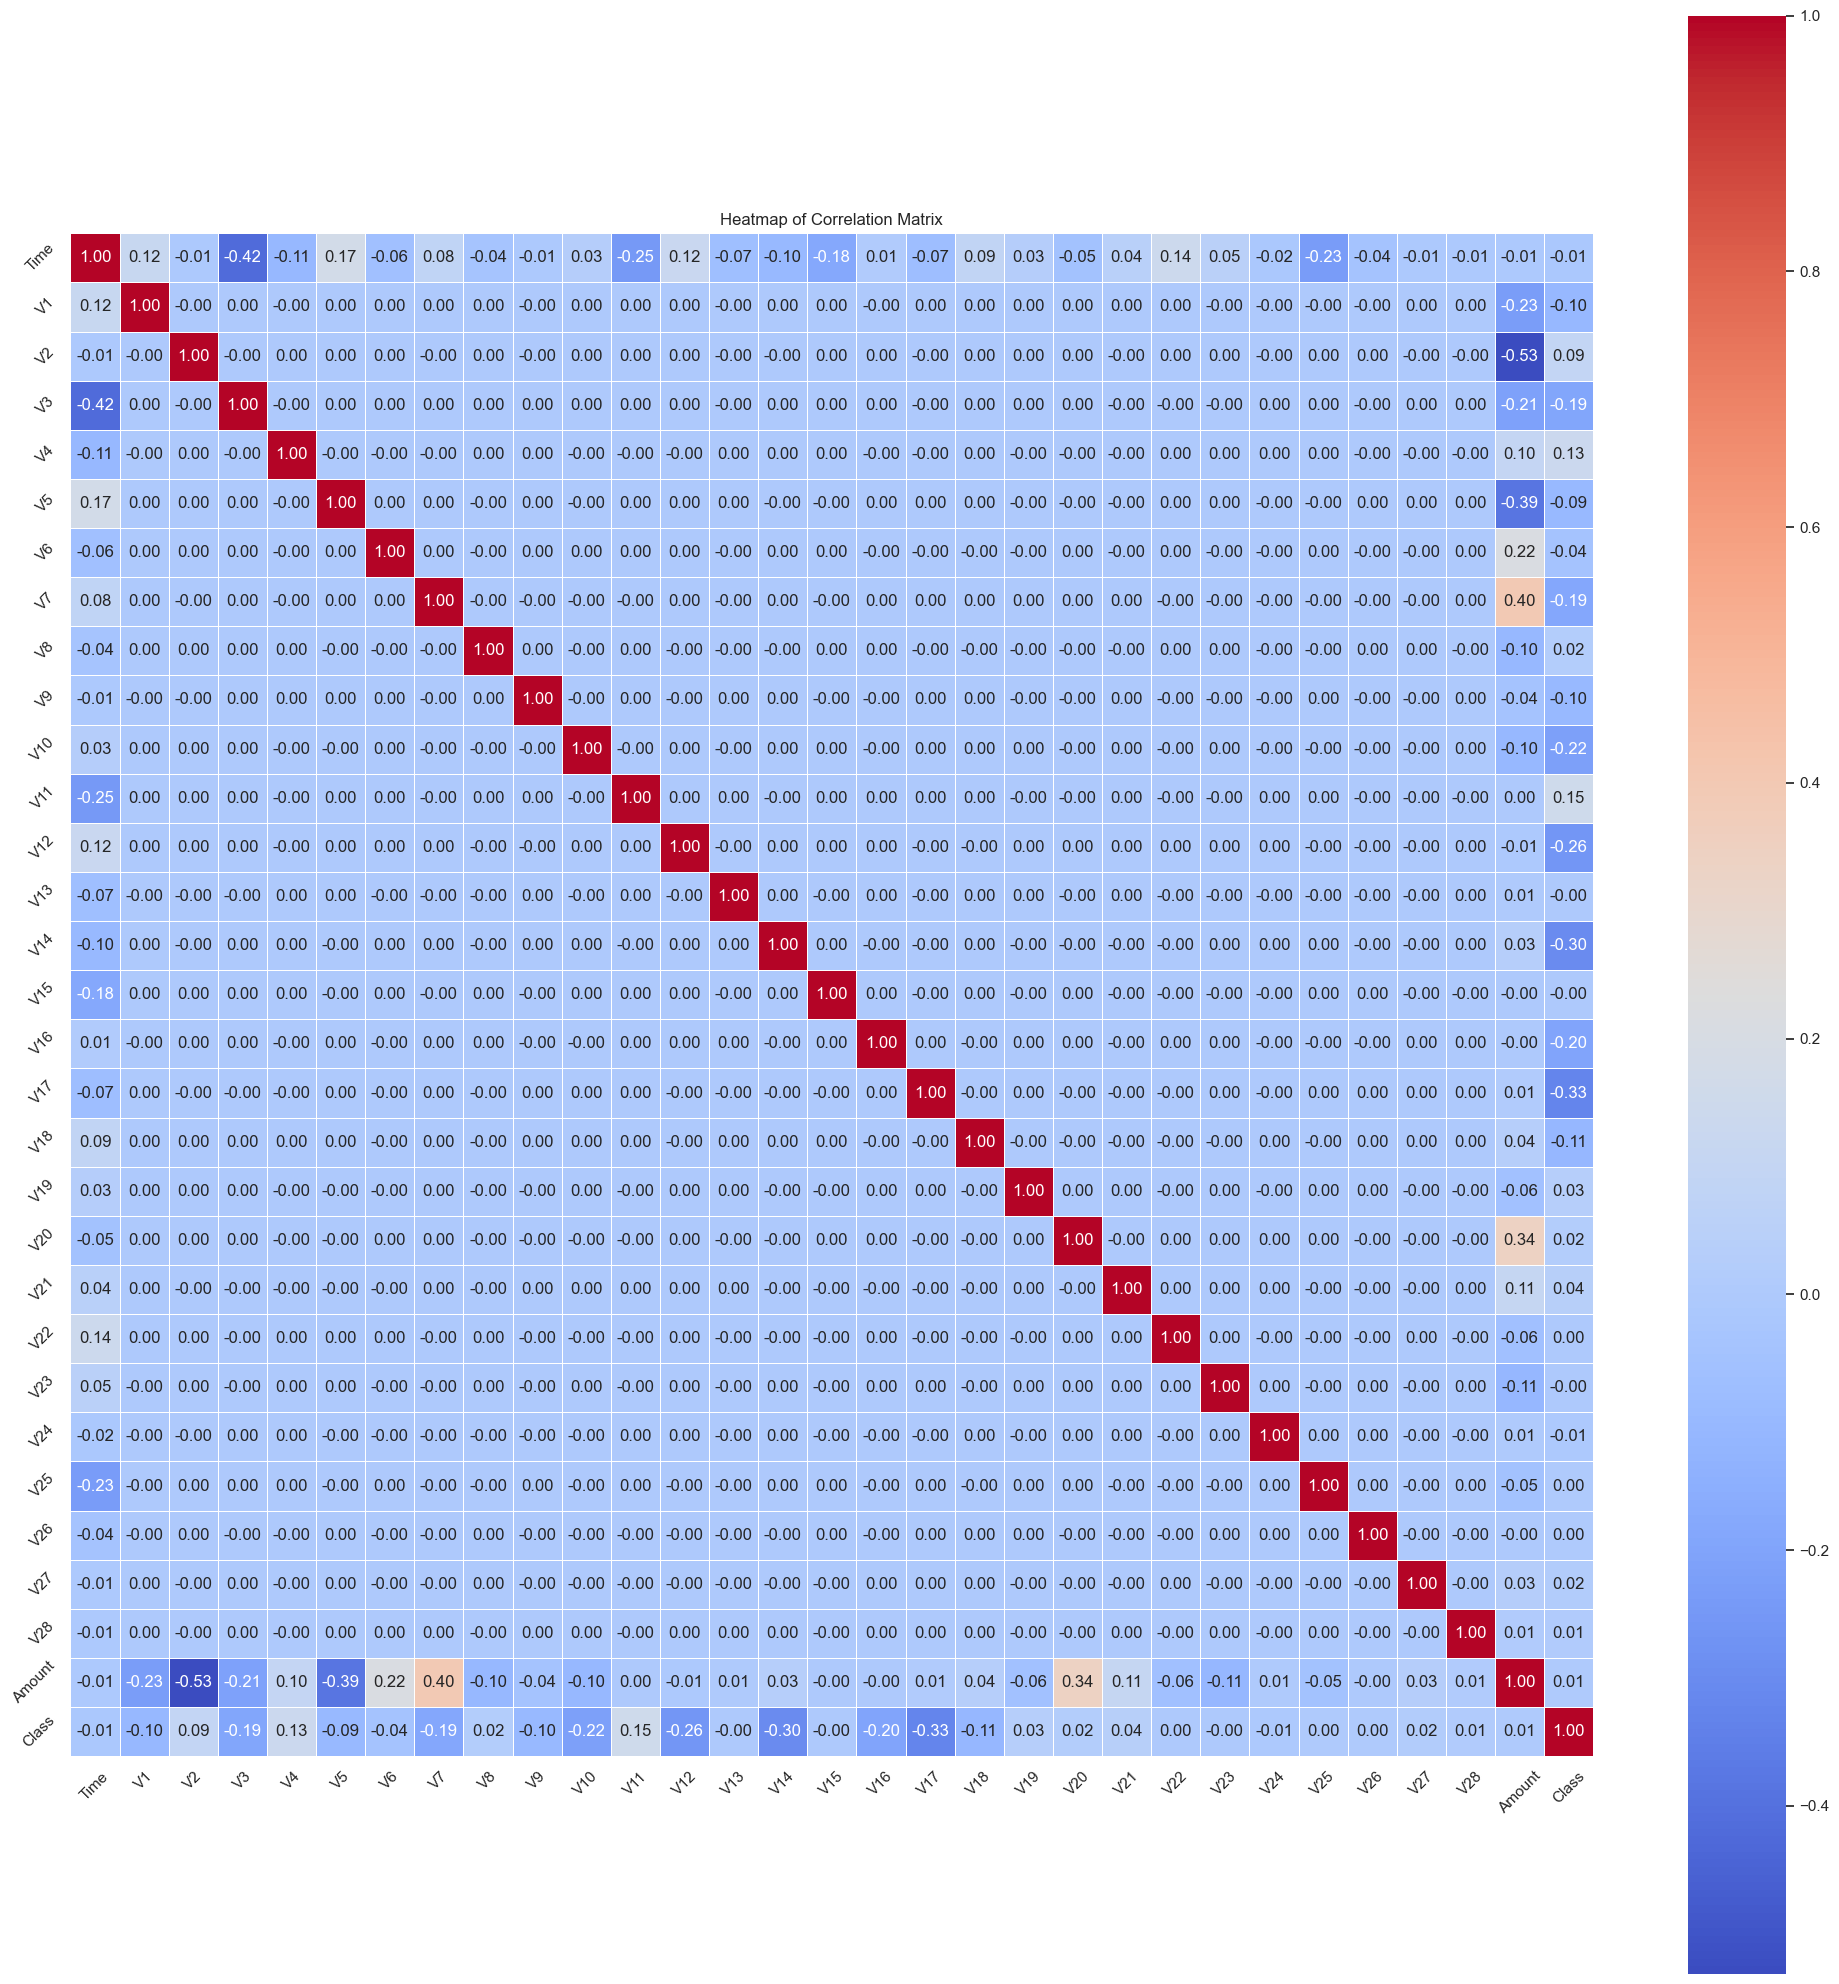

In [57]:
plt.figure(figsize=(20, 20))  
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)

plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

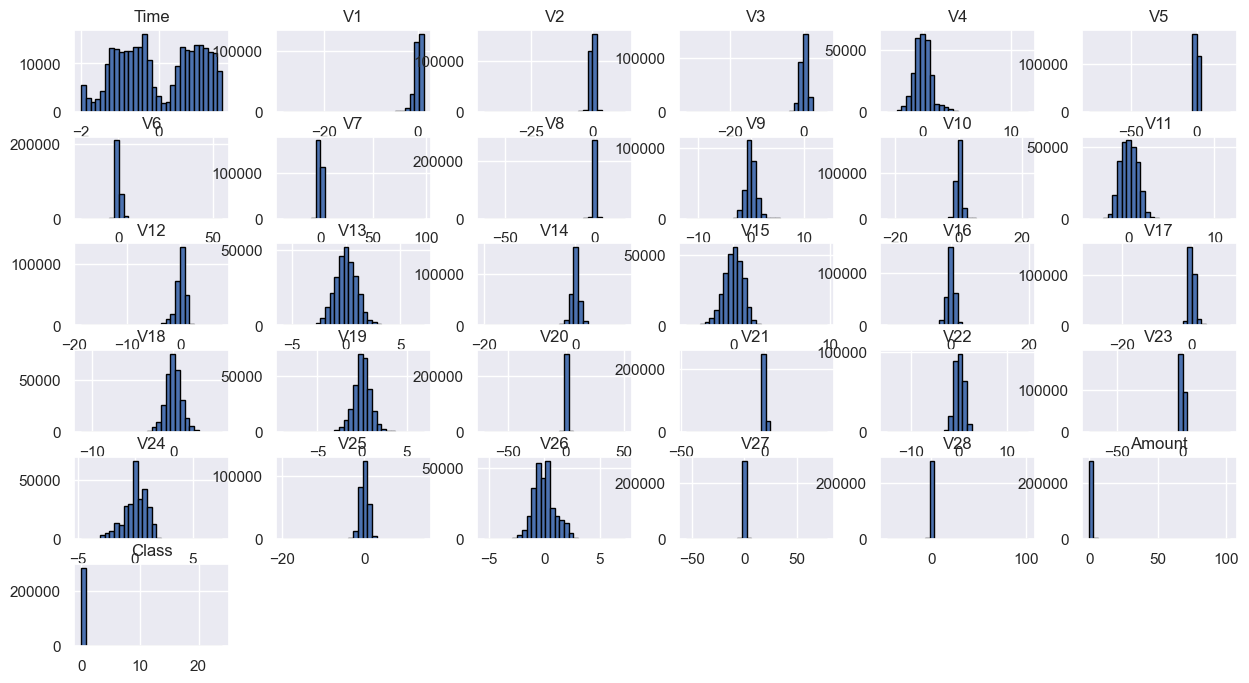

In [58]:
df_scaled.hist(figsize=(15,8),bins=30,edgecolor='black')

In [59]:
df_scaled.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [60]:


x_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X = raw_dataset[x_columns]

y = raw_dataset['Class']

X_scaled = scaler.fit_transform(X)


Entrenar Modelo

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.6, random_state=42)

In [62]:
# Model to use: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_depth = ''
best_score = 0
max_depth_selected = 0

for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    if accuracy > best_score:
        best_depth = f'max_depth: {i}'
        best_score = accuracy
        max_depth_selected = i
    print(f'The result for max_depth: {i} is {accuracy}')


print(f'\nThe best result is for {best_depth} with {best_score * 100}% of accuracy')

The result for max_depth: 1 is 0.9990695496971648
The result for max_depth: 2 is 0.9992451063580771
The result for max_depth: 3 is 0.9992041431371975
The result for max_depth: 4 is 0.9993211809111391
The result for max_depth: 5 is 0.999315329022442
The result for max_depth: 6 is 0.9993621441320186
The result for max_depth: 7 is 0.9993328846885332
The result for max_depth: 8 is 0.9992802176902595
The result for max_depth: 9 is 0.9993036252450478
The result for max_depth: 10 is 0.9992743658015625
The result for max_depth: 11 is 0.9992802176902595
The result for max_depth: 12 is 0.9992334025806829
The result for max_depth: 13 is 0.9991924393598034
The result for max_depth: 14 is 0.9991748836937121

The best result is for max_depth: 6 with 99.93621441320187% of accuracy


In [63]:
# Final Model
final_model = DecisionTreeClassifier(max_depth=max_depth_selected)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

Evaluacion Score

In [70]:
print("{:.2f}% score".format(final_model.score(X_test, y_test) * 100))

99.93% score


Aplicar modelo aun test

In [92]:
def test_new_data(modelo, new_data):
    
    x_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

    X = new_data[x_columns]

    X_scaled = scaler.fit_transform(X)
    # Make predictions with the model
    predictions = modelo.predict(X_scaled)
    return predictions

In [77]:
new_df_raw = pd.read_csv(os.path.join(src_dir,'creditcard_test.csv'))
new_df_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,...,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000
mean,94992.605324,0.006154,0.007512,-0.003109,0.000546,-0.004290,-0.000467,-0.000654,-0.001525,-0.001311,...,0.001076,0.000686,0.002330,-0.000213,-0.000922,0.001500,-0.000028,0.000916,0.000586,87.721378
std,47470.571910,1.947178,1.613885,1.523704,1.414504,1.360275,1.320588,1.226466,1.208724,1.098486,...,0.741223,0.740063,0.725990,0.601199,0.605999,0.518451,0.481808,0.395963,0.323452,234.712251
min,0.000000,-46.855047,-48.060856,-33.680984,-5.683171,-40.427726,-21.929312,-41.506796,-50.420090,-13.434066,...,-28.009635,-22.889347,-8.887017,-32.828995,-2.824849,-8.696627,-2.068561,-22.565679,-11.710896,0.000000
25%,54328.000000,-0.915890,-0.595680,-0.892183,-0.846345,-0.691706,-0.770043,-0.555497,-0.210201,-0.644744,...,-0.210817,-0.227871,-0.540603,-0.162443,-0.354898,-0.316082,-0.326900,-0.070463,-0.052419,5.600000
50%,84988.000000,0.026751,0.066323,0.176924,-0.017362,-0.051828,-0.275987,0.038865,0.021719,-0.053536,...,-0.062267,-0.029235,0.009181,-0.011798,0.039500,0.018913,-0.052530,0.001611,0.011264,22.000000
75%,139441.500000,1.317470,0.804649,1.025916,0.745578,0.611748,0.402032,0.571021,0.326609,0.595098,...,0.132404,0.186900,0.531693,0.147103,0.437897,0.351638,0.240168,0.091102,0.078250,76.900000
max,172792.000000,2.451888,21.467203,9.382558,13.129143,32.911462,23.917837,44.054461,19.168327,15.594995,...,19.746453,27.202839,8.361985,22.083545,4.022866,6.070850,3.517346,12.152401,16.129609,10199.440000


In [80]:
new_predictions = test_new_data(final_model, new_df_raw)

In [81]:
final_df = new_df_raw.copy()
final_df['Class'] = new_predictions

In [82]:
final_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,...,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000
mean,94992.605324,0.006154,0.007512,-0.003109,0.000546,-0.004290,-0.000467,-0.000654,-0.001525,-0.001311,...,0.000686,0.002330,-0.000213,-0.000922,0.001500,-0.000028,0.000916,0.000586,87.721378,0.001419
std,47470.571910,1.947178,1.613885,1.523704,1.414504,1.360275,1.320588,1.226466,1.208724,1.098486,...,0.740063,0.725990,0.601199,0.605999,0.518451,0.481808,0.395963,0.323452,234.712251,0.037637
min,0.000000,-46.855047,-48.060856,-33.680984,-5.683171,-40.427726,-21.929312,-41.506796,-50.420090,-13.434066,...,-22.889347,-8.887017,-32.828995,-2.824849,-8.696627,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54328.000000,-0.915890,-0.595680,-0.892183,-0.846345,-0.691706,-0.770043,-0.555497,-0.210201,-0.644744,...,-0.227871,-0.540603,-0.162443,-0.354898,-0.316082,-0.326900,-0.070463,-0.052419,5.600000,0.000000
50%,84988.000000,0.026751,0.066323,0.176924,-0.017362,-0.051828,-0.275987,0.038865,0.021719,-0.053536,...,-0.029235,0.009181,-0.011798,0.039500,0.018913,-0.052530,0.001611,0.011264,22.000000,0.000000
75%,139441.500000,1.317470,0.804649,1.025916,0.745578,0.611748,0.402032,0.571021,0.326609,0.595098,...,0.186900,0.531693,0.147103,0.437897,0.351638,0.240168,0.091102,0.078250,76.900000,0.000000
max,172792.000000,2.451888,21.467203,9.382558,13.129143,32.911462,23.917837,44.054461,19.168327,15.594995,...,27.202839,8.361985,22.083545,4.022866,6.070850,3.517346,12.152401,16.129609,10199.440000,1.000000


In [84]:
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [89]:
predictions_folder = os.path.join(notebook_dir,'..','prediction')

In [90]:
final_df.to_csv(os.path.join(predictions_folder,'predictions.csv'), index=False)